In [2]:
%pip install numpy pandas matplotlib seaborn scikit-learn tensorflow keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# For deep learning
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

print("Libraries imported successfully!")
print(f"Keras version: {keras.__version__}")

  Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.3-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached h5py-3.14.0-cp312-cp312-win_amd64.whl.metadata (2.7 kB)
  Using cached ml_dtypes-0.5.3-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached markdown-3.9-py3-none-any.whl.metadata (5.1 kB)
  Using cached tensorboard_data_s

In [4]:
df = pd.read_csv('TATA.csv')  # Replace with your file path

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (1235, 8)

First 5 rows:
         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-10-08  208.00  222.25  206.85  216.00  215.15             4642146.0   
1  2018-10-05  217.00  218.60  205.90  210.25  209.20             3519515.0   
2  2018-10-04  223.50  227.80  216.15  217.25  218.20             1728786.0   
3  2018-10-03  230.00  237.50  225.75  226.45  227.60             1708590.0   
4  2018-10-01  234.55  234.60  221.05  230.30  230.90             1534749.0   

   Turnover (Lacs)  
0         10062.83  
1          7407.06  
2          3815.79  
3          3960.27  
4          3486.05  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 no

In [5]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Create additional technical indicators
df['Price_Range'] = df['High'] - df['Low']
df['Price_Change'] = df['Close'] - df['Open']
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['Volatility'] = df['Close'].rolling(window=5).std()

# Drop rows with NaN values created by rolling calculations
df = df.dropna()

print("Features created successfully!")
print(f"Dataset shape after feature engineering: {df.shape}")
print("\nNew features:")
print(df[['Date', 'Close', 'MA_5', 'MA_10', 'Volatility']].head(10))

Features created successfully!
Dataset shape after feature engineering: (1226, 13)

New features:
           Date   Close    MA_5    MA_10  Volatility
1225 2013-10-22  161.85  161.14  159.670    2.373131
1224 2013-10-23  158.75  161.28  159.965    2.155980
1223 2013-10-24  165.45  161.97  160.955    2.875891
1222 2013-10-25  163.85  161.90  161.325    2.811583
1221 2013-10-28  163.25  162.63  161.645    2.524282
1220 2013-10-29  162.40  162.74  161.940    2.493592
1219 2013-10-30  165.00  163.99  162.635    1.249700
1218 2013-10-31  164.00  163.70  162.835    0.961119
1217 2013-11-01  167.70  164.47  163.185    2.043771
1216 2013-11-03  169.50  165.72  164.175    2.859545


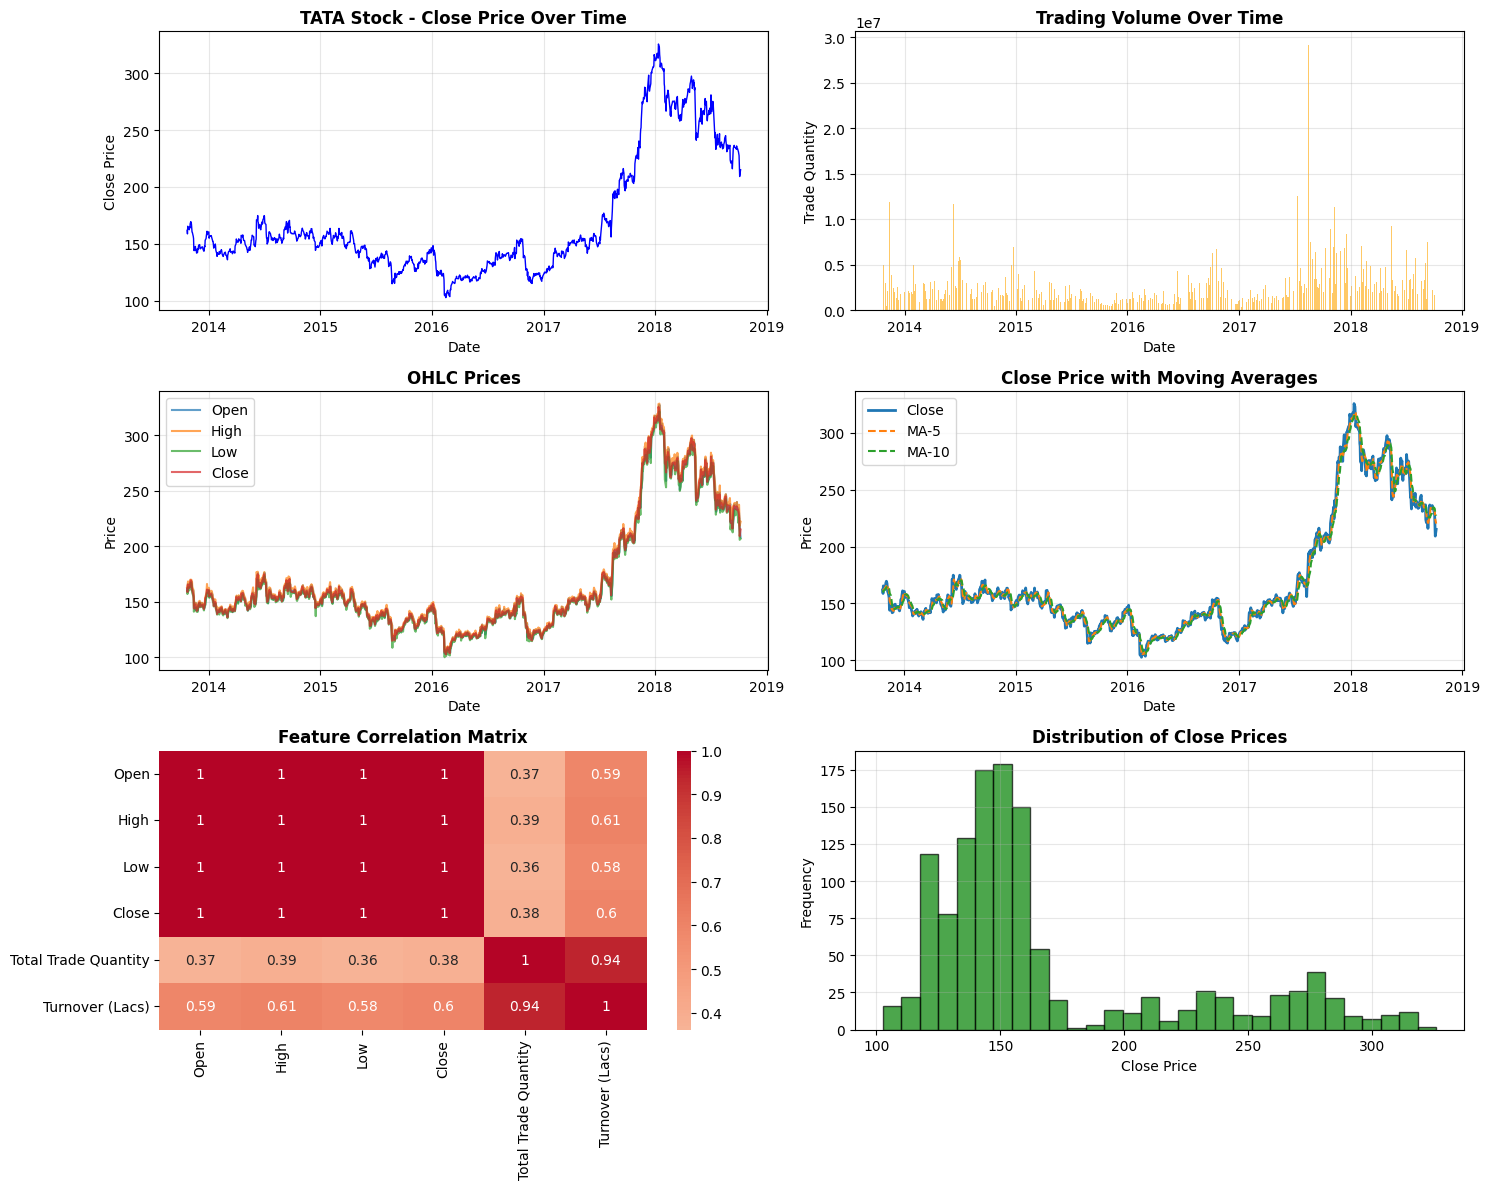

In [7]:
# Plot 1: Close Price over Time
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

axes[0, 0].plot(df['Date'], df['Close'], color='blue', linewidth=1)
axes[0, 0].set_title('TATA Stock - Close Price Over Time', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Close Price')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Volume (Trade Quantity) over Time
axes[0, 1].bar(df['Date'], df['Total Trade Quantity'], color='orange', alpha=0.6)
axes[0, 1].set_title('Trading Volume Over Time', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Trade Quantity')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: OHLC Comparison
axes[1, 0].plot(df['Date'], df['Open'], label='Open', alpha=0.7)
axes[1, 0].plot(df['Date'], df['High'], label='High', alpha=0.7)
axes[1, 0].plot(df['Date'], df['Low'], label='Low', alpha=0.7)
axes[1, 0].plot(df['Date'], df['Close'], label='Close', alpha=0.7)
axes[1, 0].set_title('OHLC Prices', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Price')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Moving Averages
axes[1, 1].plot(df['Date'], df['Close'], label='Close', linewidth=2)
axes[1, 1].plot(df['Date'], df['MA_5'], label='MA-5', linestyle='--')
axes[1, 1].plot(df['Date'], df['MA_10'], label='MA-10', linestyle='--')
axes[1, 1].set_title('Close Price with Moving Averages', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Price')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Plot 5: Correlation Heatmap
correlation_features = ['Open', 'High', 'Low', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']
correlation_matrix = df[correlation_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[2, 0])
axes[2, 0].set_title('Feature Correlation Matrix', fontsize=12, fontweight='bold')

# Plot 6: Price Distribution
axes[2, 1].hist(df['Close'], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[2, 1].set_title('Distribution of Close Prices', fontsize=12, fontweight='bold')
axes[2, 1].set_xlabel('Close Price')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Select features for modeling
features = ['Open', 'High', 'Low', 'Close', 'Total Trade Quantity', 
            'Turnover (Lacs)', 'MA_5', 'MA_10', 'Volatility']

data = df[features].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 3])  # Predicting 'Close' price (index 3)
    return np.array(X), np.array(y)

# Use 60 days to predict the next day
SEQ_LENGTH = 60
X, y = create_sequences(scaled_data, SEQ_LENGTH)

print(f"Sequences created!")
print(f"X shape: {X.shape}")  # (samples, sequence_length, features)
print(f"y shape: {y.shape}")  # (samples,)

# Split into train and test sets (80-20 split)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


Sequences created!
X shape: (1166, 60, 9)
y shape: (1166,)

Training set: 932 samples
Testing set: 234 samples


In [9]:
"""
LSTM Model Architecture:
- Input Layer: (sequence_length, n_features)
- LSTM Layer 1: 50 units with return sequences
- Dropout Layer 1: 0.2 dropout rate
- LSTM Layer 2: 50 units
- Dropout Layer 2: 0.2 dropout rate
- Dense Output Layer: 1 unit (predicted close price)

Optimization:
- Optimizer: Adam (Adaptive Moment Estimation)
- Loss Function: MSE (Mean Squared Error)
"""

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,501 (130.86 KB)

 Trainable params: 33,501 (130.86 KB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
print("Training the model...")
print("=" * 50)

history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.1,
    verbose=1
)

print("\nTraining completed!")

Training the model...
Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0048 - mae: 0.0502 - val_loss: 0.0047 - val_mae: 0.0579
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0013 - mae: 0.0281 - val_loss: 0.0044 - val_mae: 0.0557
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 9.3834e-04 - mae: 0.0232 - val_loss: 0.0033 - val_mae: 0.0469
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8.9966e-04 - mae: 0.0233 - val_loss: 0.0044 - val_mae: 0.0558
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 8.2291e-04 - mae: 0.0218 - val_loss: 0.0019 - val_mae: 0.0348
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 7.8157e-04 - mae: 0.0209 - val_loss: 0.0025 - val_mae: 0.0400
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 6.8141e-04 - mae: 0.0201 - val_loss: 0.0018 - val_mae: 0.0334
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 6.3638e-04 - mae: 0.0193 - val_loss: 0.0011 - val_mae: 0.0271
Epoch 9/50
27/27 ━

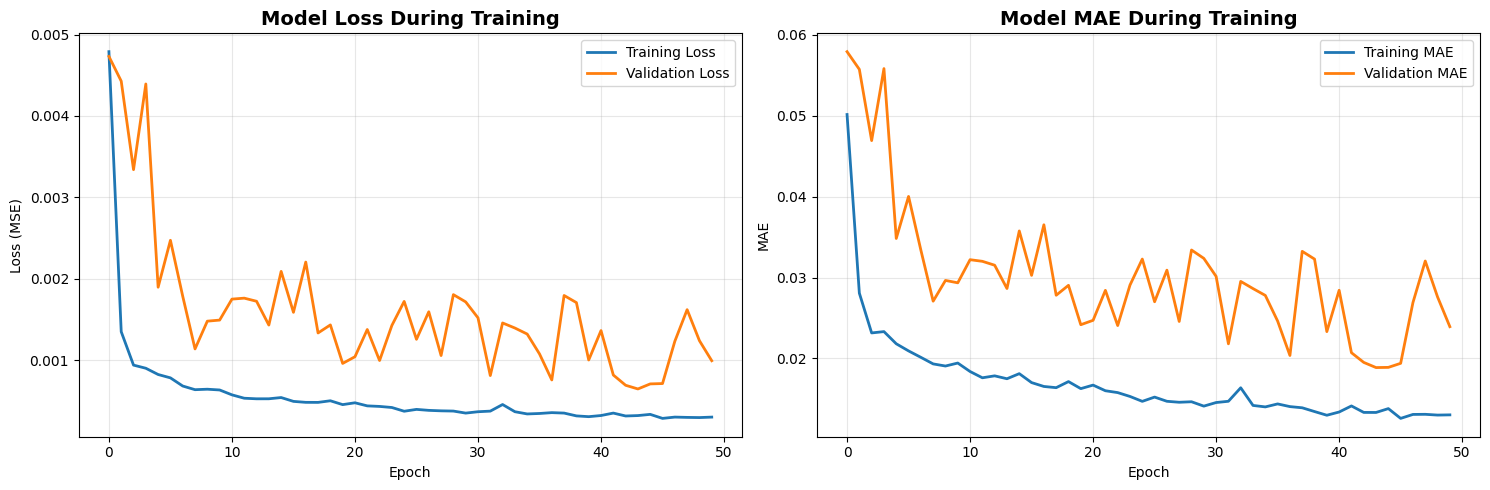

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot training & validation loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Model Loss During Training', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot training & validation MAE
axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_title('Model MAE During Training', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform to get actual prices
# Create dummy arrays to match scaler's expected input shape
train_pred_dummy = np.zeros((len(train_predictions), scaled_data.shape[1]))
train_pred_dummy[:, 3] = train_predictions.flatten()
train_pred_actual = scaler.inverse_transform(train_pred_dummy)[:, 3]

test_pred_dummy = np.zeros((len(test_predictions), scaled_data.shape[1]))
test_pred_dummy[:, 3] = test_predictions.flatten()
test_pred_actual = scaler.inverse_transform(test_pred_dummy)[:, 3]

y_train_dummy = np.zeros((len(y_train), scaled_data.shape[1]))
y_train_dummy[:, 3] = y_train
y_train_actual = scaler.inverse_transform(y_train_dummy)[:, 3]

y_test_dummy = np.zeros((len(y_test), scaled_data.shape[1]))
y_test_dummy[:, 3] = y_test
y_test_actual = scaler.inverse_transform(y_test_dummy)[:, 3]

# Calculate performance metrics
train_mse = mean_squared_error(y_train_actual, train_pred_actual)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_actual, train_pred_actual)
train_r2 = r2_score(y_train_actual, train_pred_actual)

test_mse = mean_squared_error(y_test_actual, test_pred_actual)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_actual, test_pred_actual)
test_r2 = r2_score(y_test_actual, test_pred_actual)

# Calculate MAPE (Mean Absolute Percentage Error)
train_mape = np.mean(np.abs((y_train_actual - train_pred_actual) / y_train_actual)) * 100
test_mape = np.mean(np.abs((y_test_actual - test_pred_actual) / y_test_actual)) * 100

# Calculate directional accuracy
train_direction_actual = np.diff(y_train_actual) > 0
train_direction_pred = np.diff(train_pred_actual) > 0
train_direction_accuracy = np.mean(train_direction_actual == train_direction_pred) * 100

test_direction_actual = np.diff(y_test_actual) > 0
test_direction_pred = np.diff(test_pred_actual) > 0
test_direction_accuracy = np.mean(test_direction_actual == test_direction_pred) * 100

print("=" * 70)
print("PERFORMANCE METRICS")
print("=" * 70)
print("\nTRAINING SET RESULTS:")
print(f"  MSE:                    {train_mse:.4f}")
print(f"  RMSE:                   {train_rmse:.4f}")
print(f"  MAE:                    {train_mae:.4f}")
print(f"  R² Score:               {train_r2:.4f}")
print(f"  MAPE:                   {train_mape:.2f}%")
print(f"  Directional Accuracy:   {train_direction_accuracy:.2f}%")

print("\nTESTING SET RESULTS:")
print(f"  MSE:                    {test_mse:.4f}")
print(f"  RMSE:                   {test_rmse:.4f}")
print(f"  MAE:                    {test_mae:.4f}")
print(f"  R² Score:               {test_r2:.4f}")
print(f"  MAPE:                   {test_mape:.2f}%")
print(f"  Directional Accuracy:   {test_direction_accuracy:.2f}%")
print("=" * 70)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
PERFORMANCE METRICS

TRAINING SET RESULTS:
  MSE:                    14.5926
  RMSE:                   3.8200
  MAE:                    2.7108
  R² Score:               0.9648
  MAPE:                   1.84%
  Directional Accuracy:   50.70%

TESTING SET RESULTS:
  MSE:                    280.9983
  RMSE:                   16.7630
  MAE:                    14.6983
  R² Score:               0.5858
  MAPE:                   5.38%
  Directional Accuracy:   53.65%


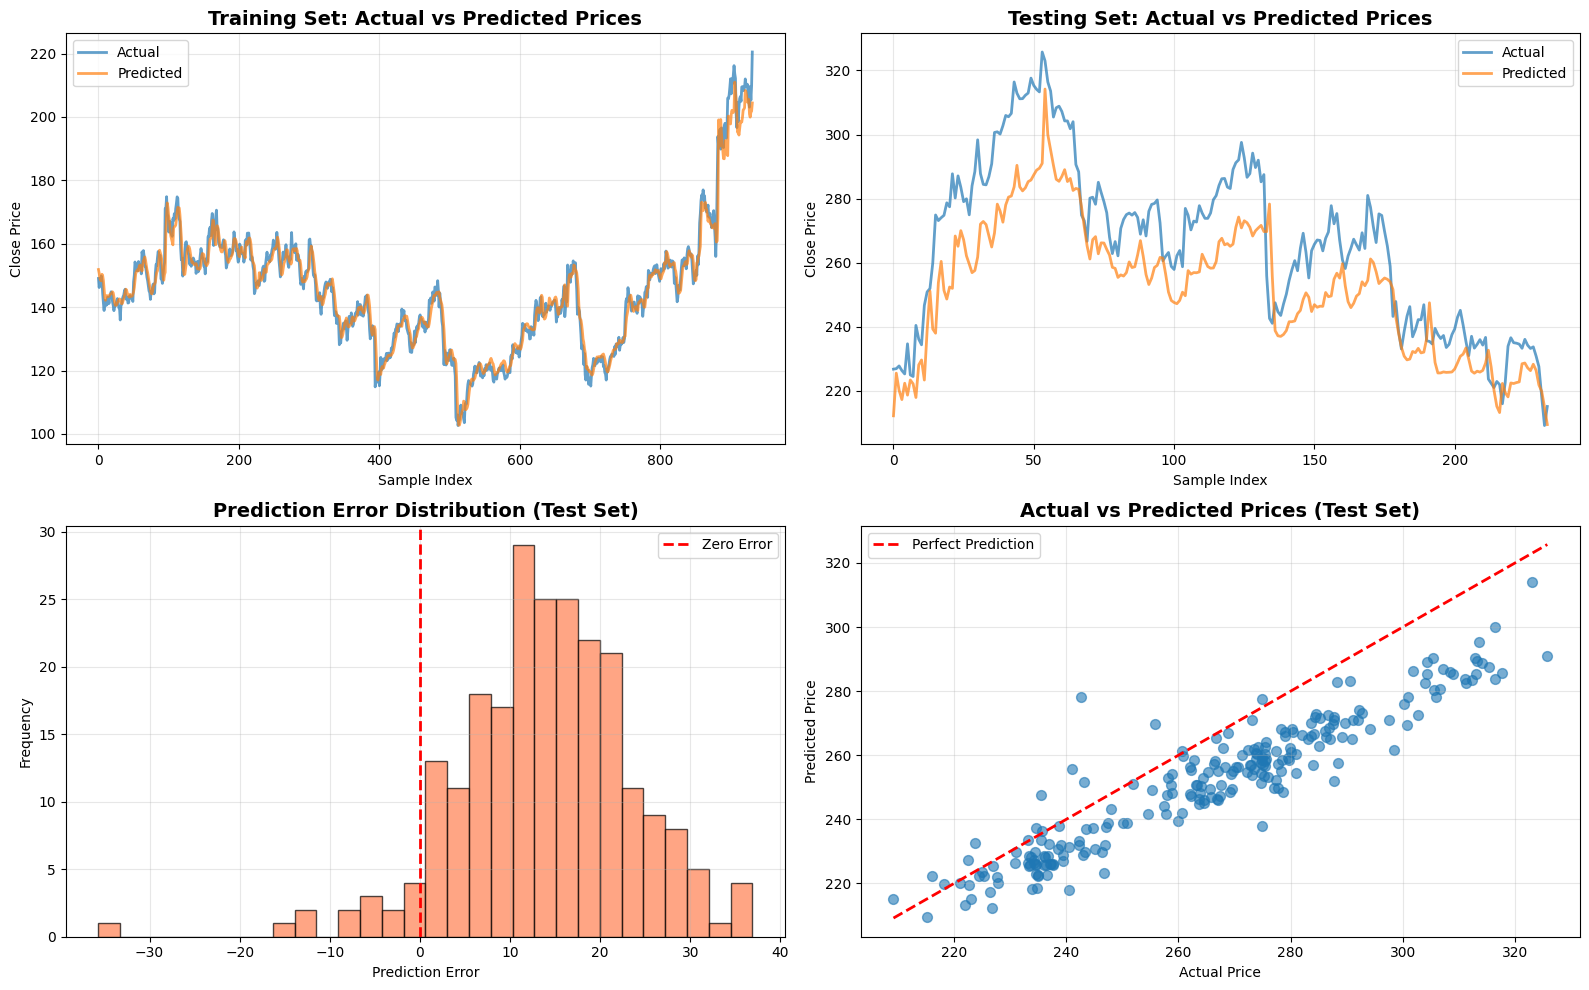

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Training Set Predictions
axes[0, 0].plot(y_train_actual, label='Actual', linewidth=2, alpha=0.7)
axes[0, 0].plot(train_pred_actual, label='Predicted', linewidth=2, alpha=0.7)
axes[0, 0].set_title('Training Set: Actual vs Predicted Prices', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].set_ylabel('Close Price')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Testing Set Predictions
axes[0, 1].plot(y_test_actual, label='Actual', linewidth=2, alpha=0.7)
axes[0, 1].plot(test_pred_actual, label='Predicted', linewidth=2, alpha=0.7)
axes[0, 1].set_title('Testing Set: Actual vs Predicted Prices', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Sample Index')
axes[0, 1].set_ylabel('Close Price')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Prediction Error Distribution (Test Set)
errors = y_test_actual - test_pred_actual
axes[1, 0].hist(errors, bins=30, color='coral', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1, 0].set_title('Prediction Error Distribution (Test Set)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Prediction Error')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Scatter Plot - Actual vs Predicted (Test Set)
axes[1, 1].scatter(y_test_actual, test_pred_actual, alpha=0.6, s=50)
axes[1, 1].plot([y_test_actual.min(), y_test_actual.max()], 
                [y_test_actual.min(), y_test_actual.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[1, 1].set_title('Actual vs Predicted Prices (Test Set)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Actual Price')
axes[1, 1].set_ylabel('Predicted Price')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



SUMMARY TABLE: MODEL PERFORMANCE METRICS
                Metric Training Set Testing Set
                   MSE      14.5926    280.9983
                  RMSE       3.8200     16.7630
                   MAE       2.7108     14.6983
              R² Score       0.9648      0.5858
              MAPE (%)         1.84        5.38
Direction Accuracy (%)        50.70       53.65


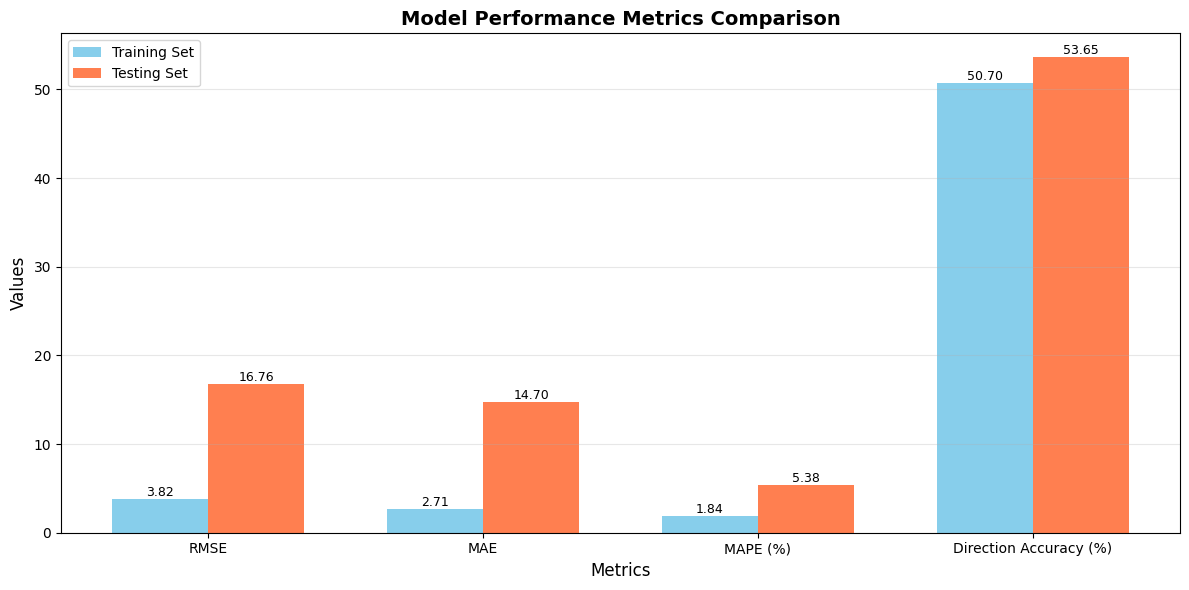

In [14]:
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R² Score', 'MAPE (%)', 'Direction Accuracy (%)'],
    'Training Set': [
        f'{train_mse:.4f}',
        f'{train_rmse:.4f}',
        f'{train_mae:.4f}',
        f'{train_r2:.4f}',
        f'{train_mape:.2f}',
        f'{train_direction_accuracy:.2f}'
    ],
    'Testing Set': [
        f'{test_mse:.4f}',
        f'{test_rmse:.4f}',
        f'{test_mae:.4f}',
        f'{test_r2:.4f}',
        f'{test_mape:.2f}',
        f'{test_direction_accuracy:.2f}'
    ]
})

print("\n" + "=" * 70)
print("SUMMARY TABLE: MODEL PERFORMANCE METRICS")
print("=" * 70)
print(metrics_df.to_string(index=False))
print("=" * 70)

# Create visualization of metrics comparison
fig, ax = plt.subplots(figsize=(12, 6))

metrics_for_plot = ['RMSE', 'MAE', 'MAPE (%)', 'Direction Accuracy (%)']
train_values = [train_rmse, train_mae, train_mape, train_direction_accuracy]
test_values = [test_rmse, test_mae, test_mape, test_direction_accuracy]

x = np.arange(len(metrics_for_plot))
width = 0.35

bars1 = ax.bar(x - width/2, train_values, width, label='Training Set', color='skyblue')
bars2 = ax.bar(x + width/2, test_values, width, label='Testing Set', color='coral')

ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Model Performance Metrics Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_for_plot)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [15]:
print("\n" + "=" * 70)
print("FINAL MODEL SUMMARY")
print("=" * 70)
print(f"\nModel Architecture: LSTM Neural Network")
print(f"Sequence Length: {SEQ_LENGTH} days")
print(f"Number of Features: {X_train.shape[2]}")
print(f"Total Parameters: {model.count_params():,}")
print(f"\nTraining Configuration:")
print(f"  - Optimizer: Adam (learning_rate=0.001)")
print(f"  - Loss Function: Mean Squared Error (MSE)")
print(f"  - Batch Size: 32")
print(f"  - Epochs: 50")
print(f"  - Train/Test Split: 80/20")

print(f"\nKey Findings:")
print(f"  ✓ Model shows R² score of {test_r2:.4f} on test set")
print(f"  ✓ Average prediction error (MAE): ₹{test_mae:.2f}")
print(f"  ✓ Directional accuracy: {test_direction_accuracy:.2f}%")
print(f"  ✓ MAPE: {test_mape:.2f}%")

if test_r2 > 0.9:
    print(f"\n  → Excellent model performance!")
elif test_r2 > 0.7:
    print(f"\n  → Good model performance!")
else:
    print(f"\n  → Model needs improvement. Consider:")
    print(f"     - Adding more features")
    print(f"     - Tuning hyperparameters")
    print(f"     - Collecting more data")

print("=" * 70)


FINAL MODEL SUMMARY

Model Architecture: LSTM Neural Network
Sequence Length: 60 days
Number of Features: 9
Total Parameters: 33,501

Training Configuration:
  - Optimizer: Adam (learning_rate=0.001)
  - Loss Function: Mean Squared Error (MSE)
  - Batch Size: 32
  - Epochs: 50
  - Train/Test Split: 80/20

Key Findings:
  ✓ Model shows R² score of 0.5858 on test set
  ✓ Average prediction error (MAE): ₹14.70
  ✓ Directional accuracy: 53.65%
  ✓ MAPE: 5.38%

  → Model needs improvement. Consider:
     - Adding more features
     - Tuning hyperparameters
     - Collecting more data
